In [2]:
!git clone https://github.com/bvezilic/Variational-autoencoder.git

Cloning into 'Variational-autoencoder'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 153 (delta 15), reused 33 (delta 7), pack-reused 112 (from 1)
Receiving objects: 100% (153/153), 1.67 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
cd Variational-autoencoder

/kaggle/working/Variational-autoencoder


In [4]:
%matplotlib inline
import json

import numpy as np
import matplotlib.pyplot as plt
from torch.optim import Adam
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from vae.callbacks import PlotCallback
from vae.loss import loss_criterion
from vae.model import VAE
from vae.train import Trainer
from vae.utils import load_model, save_model
from config import *

In [5]:
batch_size = 64
lr = 0.001
device = 'cuda'

input_size = 784
hidden_size = 512
latent_size = 10

## Dataloader

In [6]:
dataset = MNIST(DATA_DIR, transform=ToTensor(), download=True)
dataloader = DataLoader(dataset=dataset, batch_size=batch_size)

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.83MB/s]


## Model

In [7]:
model = VAE(input_size, hidden_size, latent_size)
optimizer = Adam(model.parameters(), lr=lr)

## training

In [8]:
trainer = Trainer(model=model, data_loader= dataloader, optimizer=optimizer, device= device)

In [16]:
loss = trainer.run_train_loop(epochs=25)

--------------------
Epoch 1
Loss: 5791.4526
--------------------
Epoch 2
Loss: 5781.6143
--------------------
Epoch 3
Loss: 5768.9526
--------------------
Epoch 4
Loss: 5758.3477
--------------------
Epoch 5
Loss: 5749.0137
--------------------
Epoch 6
Loss: 5734.0576
--------------------
Epoch 7
Loss: 5725.1577
--------------------
Epoch 8
Loss: 5717.0815
--------------------
Epoch 9
Loss: 5706.3545
--------------------
Epoch 10
Loss: 5701.1597
--------------------
Epoch 11
Loss: 5694.3975
--------------------
Epoch 12
Loss: 5687.0063
--------------------
Epoch 13
Loss: 5675.8486
--------------------
Epoch 14
Loss: 5668.4248
--------------------
Epoch 15
Loss: 5664.9443
--------------------
Epoch 16
Loss: 5658.8105
--------------------
Epoch 17
Loss: 5653.8525
--------------------
Epoch 18
Loss: 5643.5034
--------------------
Epoch 19
Loss: 5638.5679
--------------------
Epoch 20
Loss: 5633.9692
--------------------
Epoch 21
Loss: 5629.4717
--------------------
Epoch 22
Loss: 5620.73

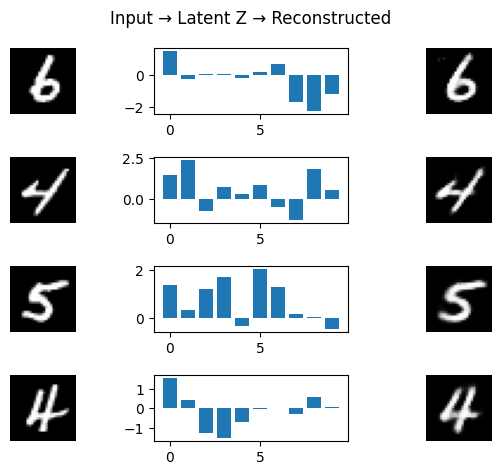

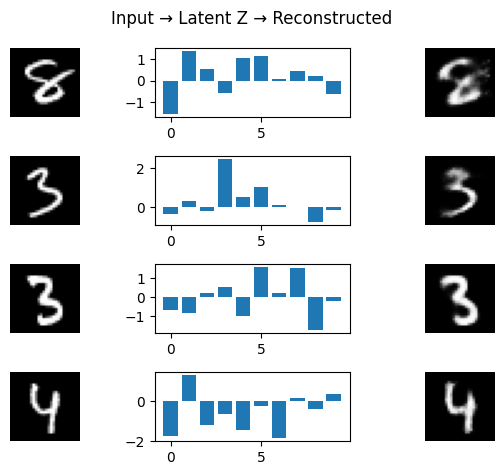

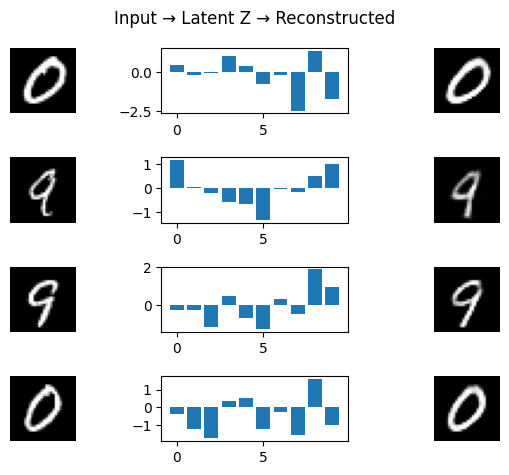

In [15]:
plot = PlotCallback()
for _ in range(3):
    plot(trainer)